In [2]:
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [3]:
pip install opencv_python

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#load and preprocess  the mnist dataset
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [6]:
len(train_images),len(train_labels)

(60000, 60000)

In [7]:
train_images[:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

In [8]:
train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [9]:
train_images[0].shape

(28, 28)

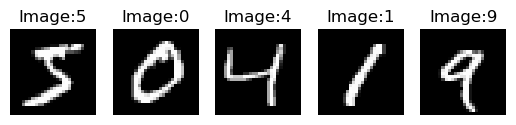

In [10]:
# display the train sample images

num_samples_to_display=5

for i in range(num_samples_to_display):
    plt.subplot(1,num_samples_to_display,i+1)
    plt.imshow(train_images[i],cmap='gray')
    plt.title(f"Image:{train_labels[i]}")
    plt.axis("off")
    
plt.show()

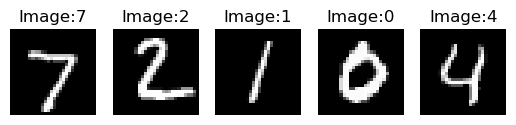

In [11]:
# display the train sample i ages

num_samples_to_display=5

for i in range(num_samples_to_display):
    plt.subplot(1,num_samples_to_display,i+1)
    plt.imshow(test_images[i],cmap='gray')
    plt.title(f"Image:{test_labels[i]}")
    plt.axis("off")

In [12]:
def showImages (images,labels):
    i=1
    for img,lab in zip(images,labels):
        plt.subplot(1,len(labels),i)
        plt.imshow(img,cmap='gray')
        plt.title(f"Image:{lab}")
        plt.axis("off")
        i=i+1
plt.show()

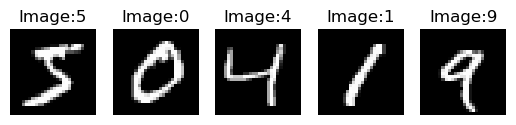

In [13]:
showImages(train_images[0:5],train_labels[0:5])

In [14]:
# scaling images i.e converting color images to grayscale images
train_images=train_images/255
test_images=test_images/255

In [15]:
# covert 2-d matrix to a 1-d array
train_images=train_images.reshape(-1,28,28,1) #training set
test_images=test_images.reshape(-1,28,28,1) #test set

In [16]:
train_images[0:3]

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [17]:
#build the cnn model

model = models.Sequential([
    layers.Conv2D(filters=25,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=25,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=25,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [18]:
#compile the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [19]:
# Train the model

model.fit(train_images,train_labels,epochs=10,batch_size=64,validation_split=0.2)

Epoch 1/10


750/750 [==============================] - 19s 18ms/step - loss: 0.4156 - accuracy: 0.8743 - val_loss: 0.1634 - val_accuracy: 0.9491
Epoch 2/10
750/750 [==============================] - 14s 19ms/step - loss: 0.1445 - accuracy: 0.9551 - val_loss: 0.1278 - val_accuracy: 0.9619
Epoch 3/10
750/750 [==============================] - 13s 17ms/step - loss: 0.1071 - accuracy: 0.9664 - val_loss: 0.0924 - val_accuracy: 0.9733
Epoch 4/10
750/750 [==============================] - 12s 16ms/step - loss: 0.0866 - accuracy: 0.9732 - val_loss: 0.0829 - val_accuracy: 0.9747
Epoch 5/10
750/750 [==============================] - 12s 17ms/step - loss: 0.0770 - accuracy: 0.9754 - val_loss: 0.0747 - val_accuracy: 0.9772
Epoch 6/10
750/750 [==============================] - 13s 17ms/step - loss: 0.0671 - accuracy: 0.9784 - val_loss: 0.0712 - val_accuracy: 0.9794
Epoch 7/10
750/750 [==============================] - 12s 16ms/step - loss: 0.0586 - accuracy: 0.9814 - val_loss: 0.0807 - val_accurac

In [20]:
#Evaluate the model on the train set

test_loss,test_acc = model.evaluate(train_images,train_labels)
print(f"Test Accuracy:{test_acc}" )

1875/1875 [==============================] - 14s 8ms/step - loss: 0.0451 - accuracy: 0.9862
Test Accuracy:0.9861833453178406


In [21]:
model.evaluate(test_images,test_labels)


313/313 [==============================] - 2s 7ms/step - loss: 0.0681 - accuracy: 0.9794


[0.06810826063156128, 0.9793999791145325]

In [22]:
#save the traind model

model.save('digit_recognition_model.h5')

D:\anaconda\Project1\env\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
model=tf.keras.models.load_model('digit_recognition_model.h5')

In [24]:
y_predict=model.predict(test_images)

313/313 [==============================] - 3s 9ms/step


In [25]:
y_predict[0]

array([8.0468894e-09, 1.8981165e-05, 1.6647614e-04, 5.1888818e-04,
       9.2234592e-10, 1.3740550e-06, 3.9382104e-12, 9.9924040e-01,
       6.2027260e-07, 5.3256586e-05], dtype=float32)

In [26]:
np.argmax(y_predict[0])

7

In [27]:
np.argmax(y_predict[1])

2

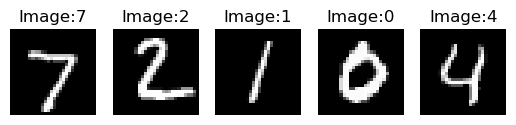

In [28]:
#display some images
num_sample_to_display=5
for i in range(num_sample_to_display):
    plt.subplot(1,num_samples_to_display,i+1)
    plt.imshow(test_images[i],cmap='gray')
    plt.title(f"Image:{test_labels[i]}")
    plt.axis("off")

In [29]:
#function to preprocess image the input image i.e it takes image path and returns as numeric matrix
def preprocess_image(image_path):
    #load the image and convert it into grayscale 
    img=cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
    
    #Resize the image to match the input size of the model
    img = cv2.resize(img,(28,28))
    
    #Normalize the pixel values to be between o and 1
    img=img/255.0
    
    #Reshape the image to match the input shape of the model
    img=np.reshape(img,(1,28,28,1))
    return img

In [30]:
# function to make predictions on the input image

def predict_image(model,image_path):
    # preprocess the input image
    processed_image=preprocess_image(image_path)
    
    #Make predictions using the model
    predictions=model.predict(processed_image)
    
    # Get the index of the class with the highest probability
    predicted_class=np.argmax(predictions)
    
    return predicted_class

In [31]:
# function to display the image
def show_image(image_path):
    img=cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [32]:
# load the trained CNN Model
from tensorflow.keras.models import load_model
model=load_model('digit_recognition_model.H5')





In [33]:
#image_path= ".\datasets\img1.png "
image_path= ".\datasets\img5.png "

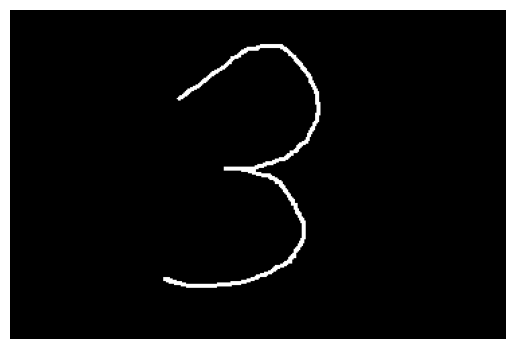

In [34]:
show_image(image_path)

In [35]:
#Read the image
image=cv2.imread(image_path)
img1=np.array(image)
img1

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [36]:
#Make a prediction on the custom_image
predict_label=predict_image(model,image_path)


1/1 [==============================] - 0s 266ms/step


In [37]:
predict_label

3

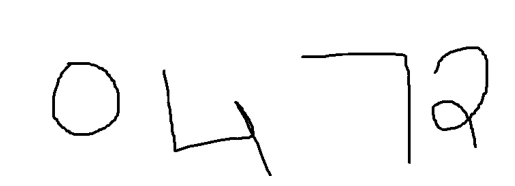

In [38]:
image_path= ".\datasets\img3.png"
show_image(image_path)

In [39]:
# Function to display the image with bounding boxes around digits
def show_image_with_boxes(image_path, boxes):
    img = cv2.imread(image_path)
    
    for box in boxes:
        x, y, w, h = box
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()

In [40]:
# Load the image
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [41]:
# Apply thresholding or other pre-processing techniques to highlight digits
# (You may need to experiment with this based on your specific images)
_, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

In [42]:
# Find contours in the image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [43]:
# List to store bounding boxes of digits
digit_boxes = []

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    
    # Filter out small contours, adjust this threshold based on your images
    if w > 5 and h > 5:
        digit_boxes.append((x, y, w, h))

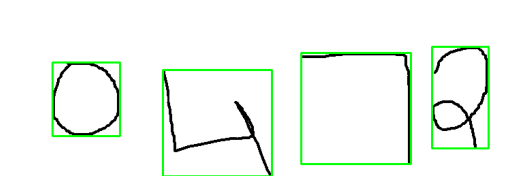

In [44]:
# Show the image with bounding boxes around detected digits
show_image_with_boxes(image_path, digit_boxes)

In [45]:
from gtts import gTTS
import os

def text_to_speech(text, language='en', filename='output.mp3'):
    # Create a gTTS object
    tts = gTTS(text=text, lang=language, slow=False)

    # Save the speech as an MP3 File
    tts.save(filename)

    # Play the generated speech
    os.system(f'start {filename}')

In [49]:
# Make predictions for each digit
i=0
speech = "Predicted Numbers are"

for box in digit_boxes:
    i=i+1
    x, y, w, h = box
    roi = img[y:y+h, x:x+w]
    roi_path = f'digit_roi_{i}.jpg'  # You may want to save each digit as a separate image
    cv2.imwrite(roi_path, roi)
    predict_label = predict_image(model, roi_path)
    print(f'The handwritten number in the ROI is predicted to be: {predict_label}')
    speech=speech+ str(predict_label)+" , "
    
#text_to_speech('f{speech}{predict_label}')
text_to_speech(text = speech )

1/1 [==============================] - 0s 66ms/step
The handwritten number in the ROI is predicted to be: 2
1/1 [==============================] - 0s 56ms/step
The handwritten number in the ROI is predicted to be: 2
1/1 [==============================] - 0s 56ms/step
The handwritten number in the ROI is predicted to be: 2
1/1 [==============================] - 0s 72ms/step
The handwritten number in the ROI is predicted to be: 2
